# Initialize


In [1]:
%load_ext autoreload
%autoreload 2


In [53]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader


from model import VAE_priorCategorical, VAE_priorHFM
import metadata as md
from datasets import Dataset_HFM, Dataset_pureHFM, load_dsprites
from utilities import  get_empirical_latent_distribution#, calculate_kl_divergence_with_HFM, sample_images



In [4]:
device = torch.device('cpu')


# Datasets


## dSprites


In [ ]:
train_loader_dSprites, val_loader_dSprites = load_dsprites()


## MNIST


In [5]:
train_loader_MNIST = torch.utils.data.DataLoader(
    datasets.MNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=md.batch_size,
    shuffle=True
    )

val_loader_MNIST = torch.utils.data.DataLoader(
    datasets.MNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=md.batch_size,
    shuffle=False
    )


## FashionMNIST


In [ ]:
train_loader_FashionMNIST = torch.utils.data.DataLoader(
    datasets.FashionMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=md.batch_size,
    shuffle=True
    )

val_loader_FashionMNIST = torch.utils.data.DataLoader(
    datasets.FashionMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=md.batch_size,
    shuffle=False
    )
## pureHFM
dataset_HFM_train = Dataset_pureHFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM/512features/glog2_train60000.pt',
                        root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

train_loader_pureHFM = DataLoader(
    dataset_HFM_train,
    batch_size=md.batch_size,
    shuffle=True
)

dataset_HFM_val = Dataset_pureHFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM/512features/glog2_validation10000.pt',
                            root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

val_loader_pureHFM = DataLoader(
    dataset_HFM_val, # Importante: usa dataset_HFM_val qui, non dataset_HFM
    batch_size=md.batch_size,
    shuffle=False
)
## expandedHFM 32-1024
dataset_HFM_train = Dataset_HFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/expandedHFM/32_1024features/2hl_glog2_train60000.pt',
                        root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

train_loader_expandedHFM_32_1024 = DataLoader(
    dataset_HFM_train,
    batch_size=md.batch_size,
    shuffle=True
)

dataset_HFM_val = Dataset_HFM(csv_file='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/expandedHFM/32_1024features/2hl_glog2_validation10000.pt',
                            root_dir='/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data/pureHFM')

val_loader_expandedHFM_32_1024 = DataLoader(
    dataset_HFM_val, # Importante: usa dataset_HFM_val qui, non dataset_HFM
    batch_size=md.batch_size,
    shuffle=False
)
# PriorHFM, klG = log2

# PriorHFM

## train over MNIST


In [6]:
train_loader = train_loader_MNIST
val_loader = val_loader_MNIST
input_dim = 784


### latent_dim = 8


In [7]:

from find_gauge import return_goodgauged_empirical_probs, find_minimum_kl_brute_force

In [25]:
def return_minimum_kl(my_model, train_loader, device, g=np.log(2)):
    empirical_probs, total_samples = get_empirical_latent_distribution(my_model, train_loader, device=device)
    good_gauged_dict = return_goodgauged_empirical_probs(empirical_probs)
    minimum_kl = find_minimum_kl_brute_force(good_gauged_dict, g=g)
    print(f"Minimum KL divergence: {minimum_kl}")
    return minimum_kl

In [27]:
g = np.log(2)

# hidden layer = 1
my_model = VAE_priorCategorical(input_dim=input_dim, categorical_dim=2, latent_dim=8, decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorCategorical/MNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))
return_minimum_kl(my_model, train_loader, device, g)



Feature frequencies: [0.45153333 0.46061667 0.51071667 0.45685    0.54076667 0.43071667
 0.51011667 0.45911667], Sorted indices: [4 2 6 1 7 3 0 5]
Processed 10000 permutations, current minimum KL: 1.4677329063415527, best permutation: (0, 6, 4, 1, 5, 2, 3, 7)
Processed 20000 permutations, current minimum KL: 1.4677329063415527, best permutation: (0, 6, 4, 1, 5, 2, 3, 7)
Processed 30000 permutations, current minimum KL: 1.461090087890625, best permutation: (4, 6, 0, 1, 5, 2, 3, 7)
Processed 40000 permutations, current minimum KL: 1.461090087890625, best permutation: (4, 6, 0, 1, 5, 2, 3, 7)
Minimum KL divergence: 1.461090087890625


tensor(1.4611)

# lambda 01

In [88]:
for g in np.arange(0.1, 2, 0.2):
    print("____________________________________________")
    print(f"Processing g = {g}")

    var_name = f"kl_divergences_lmb01_{str(round(g, 2)).replace('.', '')}"
    globals()[var_name] = []

    # hidden layer = 1
    my_model = VAE_priorCategorical(input_dim=input_dim, categorical_dim=2, latent_dim=8, decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
    my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorCategorical/MNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))
    globals()[var_name].append(return_minimum_kl(my_model, train_loader, device, g))

    # hidden layer = 2
    my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=2, LayerNorm=True).to(device)
    my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_NL_2hl_0.pth', map_location=device))
    globals()[var_name].append(return_minimum_kl(my_model, train_loader, device, g))

    # hidden layer = 3
    my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=3, LayerNorm=True).to(device)
    my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_NL_3hl_0.pth', map_location=device))
    globals()[var_name].append(return_minimum_kl(my_model, train_loader, device, g))

    # hidden layer = 4
    my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
    my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_LN_4hl_0.pth', map_location=device))
    globals()[var_name].append(return_minimum_kl(my_model, train_loader, device, g))

    # hidden layer = 5
    my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.55, device=device, num_hidden_layers=5, LayerNorm=True).to(device)
    my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr055_gKLlog2_NL_5hl_0.pth', map_location=device))
    globals()[var_name].append(return_minimum_kl(my_model, train_loader, device, g))

    # hidden layer = 6
    my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.6, device=device, num_hidden_layers=6, LayerNorm=True).to(device)
    my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr06_gKLlog2_NL_6hl_0.pth', map_location=device))
    globals()[var_name].append(return_minimum_kl(my_model, train_loader, device, g))


____________________________________________
Processing g = 0.1
Feature frequencies: [0.49583333 0.54381667 0.46478333 0.45595    0.44476667 0.52273333
 0.47725    0.4425    ], Sorted indices: [1 5 0 6 2 3 4 7]
Processed 10000 permutations, current minimum KL: 0.33234596252441406, best permutation: (1, 3, 6, 2, 0, 5, 4, 7)
Processed 20000 permutations, current minimum KL: 0.33234596252441406, best permutation: (1, 3, 6, 2, 0, 5, 4, 7)
Processed 30000 permutations, current minimum KL: 0.33234596252441406, best permutation: (1, 3, 6, 2, 0, 5, 4, 7)
Processed 40000 permutations, current minimum KL: 0.33234596252441406, best permutation: (1, 3, 6, 2, 0, 5, 4, 7)
Minimum KL divergence: 0.33234596252441406
Feature frequencies: [0.46023333 0.55815    0.4373     0.46316667 0.51475    0.5356
 0.46705    0.5171    ], Sorted indices: [1 5 7 4 6 3 0 2]
Processed 10000 permutations, current minimum KL: 0.29062747955322266, best permutation: (0, 3, 1, 2, 5, 4, 6, 7)
Processed 20000 permutations, cur

In [89]:
data_to_save = {}
for g in np.arange(0.1, 2, 0.2):
    var_name = f"kl_divergences_lmb01_{str(round(g, 2)).replace('.', '')}"
    if var_name in globals():
        data_to_save[var_name] = np.array(globals()[var_name])

# Save to file
np.savez('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Immagini/kl_divergences_priorCategorical_MNIST_lmb01.npz', **data_to_save)


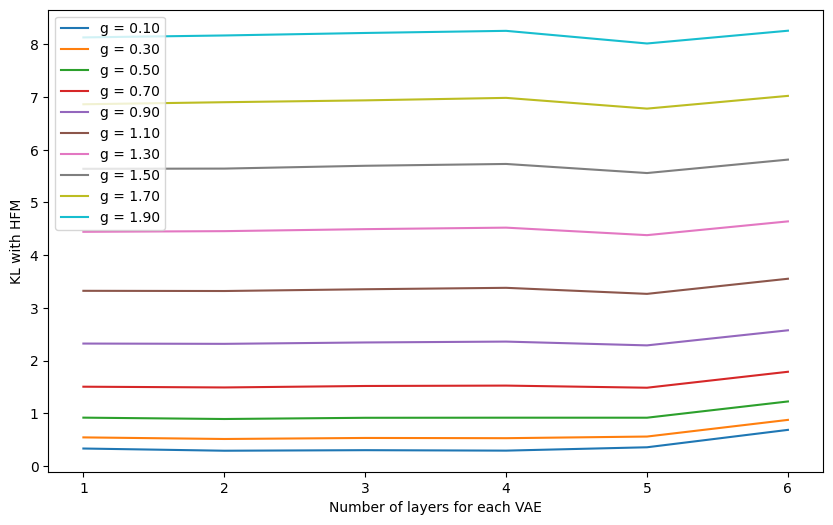

In [90]:
fig, ax = plt.subplots(figsize=(10, 6))

num_layers = [1, 2, 3, 4, 5, 6]
for i, g in enumerate(np.arange(0.1, 2, 0.2)):
    var_name = f"kl_divergences_lmb01_{str(round(g, 2)).replace('.', '')}"
    values = globals()[var_name]
    # Convert tensors to floats for plotting
    values = [v.item() if hasattr(v, "item") else v for v in values]
    ax.plot(num_layers, values, label=f'g = {g:.2f}')


ax.set_xlabel('Number of layers for each VAE')
ax.set_ylabel('KL with HFM')
ax.legend(loc='upper left')
plt.show()

#--------------------
# Get the default color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


In [91]:
import os

# Create directory if it doesn't exist
save_dir = "/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Immagini/kl_divergence_priorCategorical_MNIST/lmb01"
os.makedirs(save_dir, exist_ok=True)

# Get the default color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Create individual plots for each g value
for i, g in enumerate(np.arange(0.1, 2, 0.2)):
    var_name = f"kl_divergences_lmb01_{str(round(g, 2)).replace('.', '')}"
    
    if var_name in globals():
        plt.figure(figsize=(8, 6))
        values = globals()[var_name]
        # Convert tensors to floats for plotting
        values = [v.item() if hasattr(v, "item") else v for v in values]
        
        plt.plot(num_layers, values, color=colors[i], linewidth=2, marker='o')
        plt.xlabel('Number of layers for each VAE')
        plt.ylabel('KL with HFM')
        plt.title(f'g of HFM = {g:.1f}')
        plt.grid(True, alpha=0.3)
        
        # Save the figure
        filename = f"kl_divergence_g_{g:.1f}.png"
        filepath = os.path.join(save_dir, filename)
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
        plt.close()  # Close the figure to free memory
        
        print(f"Saved: {filepath}")

print(f"All plots saved to: {save_dir}")

Saved: /Users/enricofrausin/Programmazione/PythonProjects/Fisica/Immagini/kl_divergence_priorCategorical_MNIST/lmb01/kl_divergence_g_0.1.png
Saved: /Users/enricofrausin/Programmazione/PythonProjects/Fisica/Immagini/kl_divergence_priorCategorical_MNIST/lmb01/kl_divergence_g_0.3.png
Saved: /Users/enricofrausin/Programmazione/PythonProjects/Fisica/Immagini/kl_divergence_priorCategorical_MNIST/lmb01/kl_divergence_g_0.5.png
Saved: /Users/enricofrausin/Programmazione/PythonProjects/Fisica/Immagini/kl_divergence_priorCategorical_MNIST/lmb01/kl_divergence_g_0.7.png
Saved: /Users/enricofrausin/Programmazione/PythonProjects/Fisica/Immagini/kl_divergence_priorCategorical_MNIST/lmb01/kl_divergence_g_0.9.png
Saved: /Users/enricofrausin/Programmazione/PythonProjects/Fisica/Immagini/kl_divergence_priorCategorical_MNIST/lmb01/kl_divergence_g_1.1.png
Saved: /Users/enricofrausin/Programmazione/PythonProjects/Fisica/Immagini/kl_divergence_priorCategorical_MNIST/lmb01/kl_divergence_g_1.3.png
Saved: /Users

# lambda misto

In [29]:
kl_divergences = []

In [52]:
for g in np.arange(0.1, 2, 0.2):
    print("____________________________________________")
    print(f"Processing g = {g}")

    var_name = f"kl_divergences_{str(round(g, 2)).replace('.', '')}"
    globals()[var_name] = []

    # hidden layer = 1
    my_model = VAE_priorCategorical(input_dim=input_dim, categorical_dim=2, latent_dim=8, decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
    my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorCategorical/MNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))
    globals()[var_name].append(return_minimum_kl(my_model, train_loader, device, g))

    # hidden layer = 2
    my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=2, LayerNorm=True).to(device)
    my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_NL_2hl_0.pth', map_location=device))
    globals()[var_name].append(return_minimum_kl(my_model, train_loader, device, g))

    # hidden layer = 3
    my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=3, LayerNorm=True).to(device)
    my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_NL_3hl_0.pth', map_location=device))
    globals()[var_name].append(return_minimum_kl(my_model, train_loader, device, g))

    # hidden layer = 4
    my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.5, device=device, num_hidden_layers=4, LayerNorm=True).to(device)
    my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_LN_4hl_0.pth', map_location=device))
    globals()[var_name].append(return_minimum_kl(my_model, train_loader, device, g))

    # hidden layer = 5
    my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.55, device=device, num_hidden_layers=5, LayerNorm=True).to(device)
    my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr055_gKLlog2_NL_5hl_0.pth', map_location=device))
    globals()[var_name].append(return_minimum_kl(my_model, train_loader, device, g))

    # hidden layer = 6
    my_model = VAE_priorHFM(input_dim=input_dim, latent_dim=8, g=np.log(2), decrease_rate=0.6, device=device, num_hidden_layers=6, LayerNorm=True).to(device)
    my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorHFM/MNIST/ld8_glog2_ep15_lmb01_dr06_gKLlog2_NL_6hl_0.pth', map_location=device))
    globals()[var_name].append(return_minimum_kl(my_model, train_loader, device, g))




____________________________________________
Processing g = 0.1
Feature frequencies: [0.45135    0.4581     0.51026667 0.45945    0.54046667 0.4313
 0.5114     0.4591    ], Sorted indices: [4 6 2 3 7 1 0 5]
Processed 10000 permutations, current minimum KL: 0.30961132049560547, best permutation: (0, 6, 4, 2, 3, 1, 5, 7)
Processed 20000 permutations, current minimum KL: 0.30961132049560547, best permutation: (0, 6, 4, 2, 3, 1, 5, 7)
Processed 30000 permutations, current minimum KL: 0.3086681365966797, best permutation: (4, 6, 0, 2, 3, 1, 5, 7)
Processed 40000 permutations, current minimum KL: 0.3086681365966797, best permutation: (4, 6, 0, 2, 3, 1, 5, 7)
Minimum KL divergence: 0.3086681365966797
Feature frequencies: [0.4625     0.55783333 0.43563333 0.46346667 0.5134     0.53271667
 0.46623333 0.51896667], Sorted indices: [1 5 7 4 6 3 0 2]
Processed 10000 permutations, current minimum KL: 0.28838109970092773, best permutation: (0, 3, 1, 2, 5, 4, 6, 7)
Processed 20000 permutations, curren

In [70]:
# After your loop, collect all the variables and save them
data_to_save = {}
for g in np.arange(0.1, 2, 0.2):
    var_name = f"kl_divergences_{str(round(g, 2)).replace('.', '')}"
    if var_name in globals():
        data_to_save[var_name] = np.array(globals()[var_name])

# Save to file
np.savez('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Immagini/kl_divergences_priorCategorical_MNIST.npz', **data_to_save)

# To load later:
# loaded_data = np.load('kl_divergences_results.npz')
# kl_divergences_01 = loaded_data['kl_divergences_01']

In [87]:
g = 0.7

my_model = VAE_priorCategorical(input_dim=input_dim, categorical_dim=2, latent_dim=8, decrease_rate=0.5, device=device, num_hidden_layers=1, LayerNorm=True).to(device)
my_model.load_state_dict(torch.load('/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Architetture/VAE/discrete/models_parameters/priorCategorical/MNIST/ld8_glog2_ep15_lmb01_dr05_gKLlog2_LN_1hl_0.pth', map_location=device))
kl_01_lambda = return_minimum_kl(my_model, train_loader, device, g)

Feature frequencies: [0.4971     0.5437     0.4646     0.4558     0.44348333 0.52131667
 0.47796667 0.44348333], Sorted indices: [1 5 0 6 2 3 7 4]
Processed 10000 permutations, current minimum KL: 1.507232666015625, best permutation: (1, 3, 7, 2, 0, 5, 4, 6)
Processed 10000 permutations, current minimum KL: 1.507232666015625, best permutation: (1, 3, 7, 2, 0, 5, 4, 6)
Processed 20000 permutations, current minimum KL: 1.507232666015625, best permutation: (1, 3, 7, 2, 0, 5, 4, 6)
Processed 20000 permutations, current minimum KL: 1.507232666015625, best permutation: (1, 3, 7, 2, 0, 5, 4, 6)
Processed 30000 permutations, current minimum KL: 1.507232666015625, best permutation: (1, 3, 7, 2, 0, 5, 4, 6)
Processed 30000 permutations, current minimum KL: 1.507232666015625, best permutation: (1, 3, 7, 2, 0, 5, 4, 6)
Processed 40000 permutations, current minimum KL: 1.507232666015625, best permutation: (1, 3, 7, 2, 0, 5, 4, 6)
Minimum KL divergence: 1.507232666015625
Processed 40000 permutations

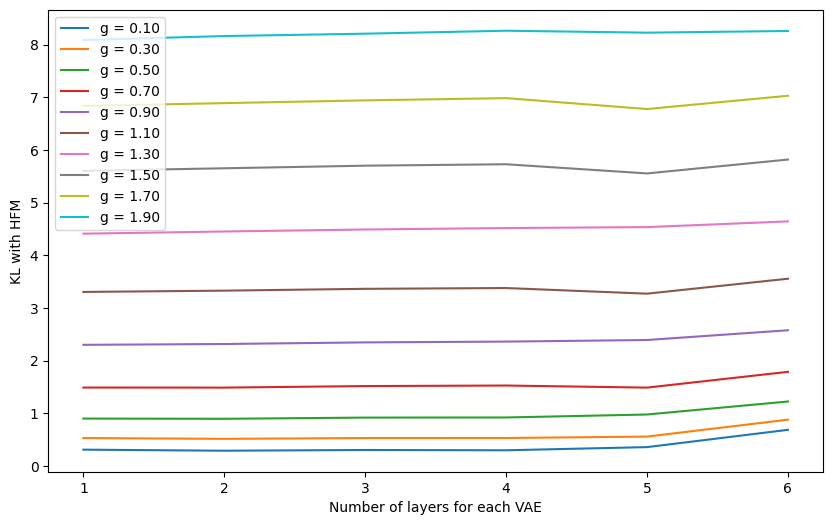

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

num_layers = [1, 2, 3, 4, 5, 6]
for i, g in enumerate(np.arange(0.1, 2, 0.2)):
    var_name = f"kl_divergences_{str(round(g, 2)).replace('.', '')}"
    values = globals()[var_name]
    # Convert tensors to floats for plotting
    values = [v.item() if hasattr(v, "item") else v for v in values]
    ax.plot(num_layers, values, label=f'g = {g:.2f}')


ax.set_xlabel('Number of layers for each VAE')
ax.set_ylabel('KL with HFM')
ax.legend(loc='upper left')
plt.show()

#--------------------
# Get the default color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure()
plt.plot(num_layers, kl_divergences_01, color=colors[0])  # Use first color (same as g=0.1 in upper plot)
plt.xlabel('Number of layers for each VAE')
plt.ylabel('KL with HFM')
plt.title('g of HFM = 0.1')
plt.show()

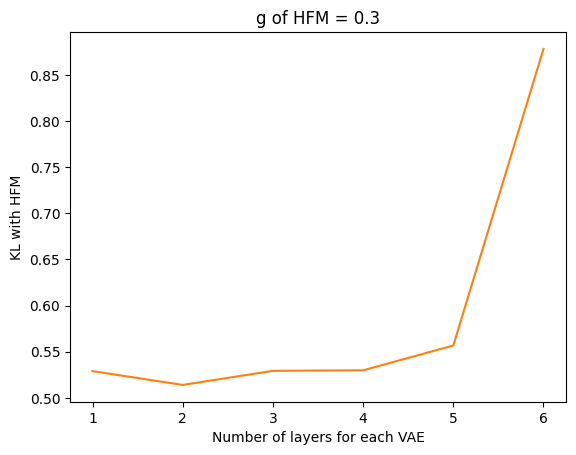

In [85]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure()
plt.plot(num_layers, kl_divergences_03, color=colors[1])  # Use first color (same as g=0.1 in upper plot)
plt.xlabel('Number of layers for each VAE')
plt.ylabel('KL with HFM')
plt.title('g of HFM = 0.3')
plt.show()

In [86]:
import os

# Create directory if it doesn't exist
save_dir = "/Users/enricofrausin/Programmazione/PythonProjects/Fisica/Immagini/kl_divergence_priorCategorical_MNIST"
os.makedirs(save_dir, exist_ok=True)

# Get the default color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Create individual plots for each g value
for i, g in enumerate(np.arange(0.1, 2, 0.2)):
    var_name = f"kl_divergences_{str(round(g, 2)).replace('.', '')}"
    
    if var_name in globals():
        plt.figure(figsize=(8, 6))
        values = globals()[var_name]
        # Convert tensors to floats for plotting
        values = [v.item() if hasattr(v, "item") else v for v in values]
        
        plt.plot(num_layers, values, color=colors[i], linewidth=2, marker='o')
        plt.xlabel('Number of layers for each VAE')
        plt.ylabel('KL with HFM')
        plt.title(f'g of HFM = {g:.1f}')
        plt.grid(True, alpha=0.3)
        
        # Save the figure
        filename = f"kl_divergence_g_{g:.1f}.png"
        filepath = os.path.join(save_dir, filename)
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
        plt.close()  # Close the figure to free memory
        
        print(f"Saved: {filepath}")

print(f"All plots saved to: {save_dir}")

Saved: /Users/enricofrausin/Programmazione/PythonProjects/Fisica/Immagini/kl_divergence_priorCategorical_MNIST/kl_divergence_g_0.1.png
Saved: /Users/enricofrausin/Programmazione/PythonProjects/Fisica/Immagini/kl_divergence_priorCategorical_MNIST/kl_divergence_g_0.3.png
Saved: /Users/enricofrausin/Programmazione/PythonProjects/Fisica/Immagini/kl_divergence_priorCategorical_MNIST/kl_divergence_g_0.5.png
Saved: /Users/enricofrausin/Programmazione/PythonProjects/Fisica/Immagini/kl_divergence_priorCategorical_MNIST/kl_divergence_g_0.7.png
Saved: /Users/enricofrausin/Programmazione/PythonProjects/Fisica/Immagini/kl_divergence_priorCategorical_MNIST/kl_divergence_g_0.9.png
Saved: /Users/enricofrausin/Programmazione/PythonProjects/Fisica/Immagini/kl_divergence_priorCategorical_MNIST/kl_divergence_g_1.1.png
Saved: /Users/enricofrausin/Programmazione/PythonProjects/Fisica/Immagini/kl_divergence_priorCategorical_MNIST/kl_divergence_g_0.7.png
Saved: /Users/enricofrausin/Programmazione/PythonProjec